# Homework 3: Tables and Charts (50 points)

Please complete this notebook by filling in the cells provided. The solved homework should be uploaded to Canvas.




**Reading**: 

Data8 textbook chapters [5](http://www.inferentialthinking.com/chapters/05/sequences.html) and [6](http://www.inferentialthinking.com/chapters/06/tables.html) and [7.1](http://www.inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions).

**Deadline**:

This assignment is due on Tuesday, October 23 at 9:30am. Late work will not be accepted unless you have made special arrangements with the instructors.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck.

In [106]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


## 1. Unemployment (12 points)


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below we've loaded data on unemployment in the United States.  There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [107]:
unemployment = Table.read_table('unemployment.csv')
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


**Question 2.** Sort the data in decreasing order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in decreasing order by NEI-PTER instead.

In [108]:
by_nei = unemployment.sort('NEI', descending='TRUE')
by_nei_pter = unemployment.sort('NEI-PTER', descending='TRUE')

**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [109]:
greatest_nei = by_nei.take(np.arange(0, 10))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [110]:
pter = unemployment.column('NEI-PTER') - unemployment.column('NEI')
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in decreasing order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [111]:
by_pter = unemployment.with_columns('PTER', pter).sort('PTER', descending='TRUE')
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


**Question 6.** Does it seem true that the PTER rate was very high during the Great Recession, compared to other periods in the dataset? Justify your answer by referring to specific values in the table or by generating a chart.

Google says the Great Recession lasted from Dec 2007 to June 2009.
It does not seem true that the PTER rate was very high. Ranked from highest to lowest PTER score, the highest at 1.93 is after the Great Recession. Out of the top 10 results, only one is actually during the Great Recession (April 2009, PTER = 1.84). Other than that, they are all after June 2009. Therefore, it does not seem true that the PTER rate was very high during the Great Recession. If anything, it was very high in the period after the great Recession (2009-2011).

## 2. Birth Rates (15 points)


The following table gives census-based population estimates for each state on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.*

In [112]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the number of births in that period as a proportion of the population at the start of the period.

In [113]:
us_birth_rate = sum(pop.column('BIRTHS'))/sum(pop.column('2015'))
us_birth_rate

0.012358536498646102

**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*.

In [114]:
growth = (pop.column('2016') - pop.column('2015'))/pop.column('2015')
fastest_growth = pop.with_columns('growth', growth).sort('growth', descending='TRUE').take(np.arange(0,5))
fastest_growth

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,growth
4,Utah,"2,990,632","3,051,217","51,444","16,447","25,412",176,0.0202583
4,Nevada,"2,883,758","2,940,058","36,462","23,771","41,967","1,642",0.0195231
4,Idaho,"1,652,828","1,683,140","22,792","12,496","18,869","1,147",0.0183395
3,Florida,"20,244,914","20,612,439","222,793","201,485","325,986","20,231",0.0181539
4,Washington,"7,160,290","7,288,000","89,982","55,979","91,981","1,726",0.0178359


**Question 3.** Assign `movers` to the number of states for which the absolute annual rate of migration was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [115]:
migration = abs(pop.column('MIGRATION')/pop.column('2015'))
table_mig = pop.with_columns('rate of mig', migration)

movers = pop.where(migration, are.above(.01)).num_rows
movers

9

**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US).

In [116]:
region4 = pop.where(pop.column('REGION'), are.containing('4'))
west_births = sum(region4.column('BIRTHS'))
west_births

979657

**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *number of babies born in region 4 (the Western US)* during this time interval.

In [117]:
less_than_west_births = pop.where(pop.column('2016'), are.below(west_births)).num_rows
less_than_west_births

7

**Question 6.** Was there an association between numbers of births and numbers of deaths across states during this time interval? Use the code cell below to support your conclusion with a chart. If an association exists, what might explain it?

There does seem to be an association between numbers of births and number of deaths across states. The chart below shows a positive, linear correlation where as the number of births increases, so does the number of deaths. This could be a function of population where both births and deaths are a factor of the overall population. The more people you have in a state, the more people are going to both be born and die due to a natural life cycle. 

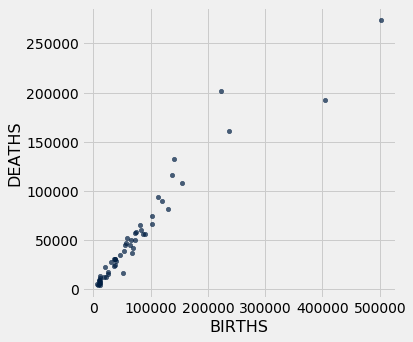

In [118]:
# Generate a chart here to support your conclusion
pop.scatter('BIRTHS','DEATHS')

## 3. Colleges (18 points)


The question uses data on colleges from Homework 1. Recall that the dataset was posted on Kaggle at the beginning of 2018, and was grabbed from US-News: https://www.usnews.com. It includes statistics for 311 US Universities. 

To make your tasks easiear, we removed many of the columns and kept only 11. The corresponding file can be found here:

http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv


#### Run the next cell that contains code that will allow you to read the data into a table called "colleges_table". It also shows the first 10 rows.


In [119]:
# Just run this cell.
colleges_table=Table.read_table('http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv')
colleges_table

act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
32,1400,5400,7,100,60,16793,47140,Princeton University,1,private
32,1430,6710,5,98,55,16338,48949,Harvard University,2,private
32,1450,5941,8,96,42,27767,54825,University of Chicago,3,private
32,1420,5472,6,96,50,18385,51400,Yale University,3,private
32,1430,6113,6,95,48,21041,57208,Columbia University,5,private
33,1460,4524,8,95,58,20331,49892,Massachusetts Institute of Technology,5,private
31,1380,7034,5,95,47,19296,49617,Stanford University,5,private
32,1380,10019,9,93,47,25441,53534,University of Pennsylvania,8,private
31,1380,6609,11,92,41,23374,53744,Duke University,9,private
34,1510,979,8,91,51,23973,49908,California Institute of Technology,10,private


**Run the following command that will make a scatterplot of SAT average scores (x-axis) and tuition (y-axis).**

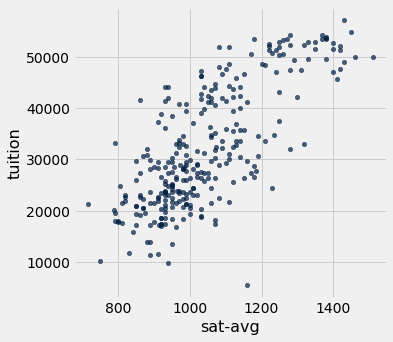

In [120]:
colleges_table.scatter('sat-avg','tuition')

**Question 1.**  Describe in few words the pattern you see. Then give three alternative explanations for this pattern using the three possibilities/models for an association we discussed in Lecture 3: causality, common response, confounding. You need to give possible explanations for all three models. Which model makes most sense to you? Explain.

I see a generally strong, positive, linear correlation between average SAT score and tuition. 

Causality: Higher sat scores cause schools to have higher tuition.

Common Response: Tuition and SAT scores both happen to be caused by some other variable. For example, quality of the school. The changes in SAT score will vary with quality of school. The tuition will also vary with quality of the school. 

Confounding: There could be factors we are not considering that affect either average SAT scores or tuition that we do not know the relationship for. For example, student wealth may impact school tuition as the school accepts those who can pay but those same people are likely doing well on the SAT because they have the resources to study.

The common response model makes the most sense to me because I expect there to be a lurking variable that directly accounts for both average sat scores and tuition such as school quality or reputation. While there may be multiple other confounding variables, the common response model more directly accounts for the trend.

**Question 2.** Draw a scatterplot of SAT average (x-axis) and 'cost-after-aid' (y-axis) and then describe the pattern you see. Provide an explanation for this pattern.

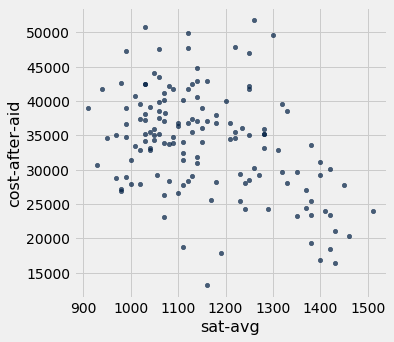

In [121]:
# use this cell for the code that will draw the scatterplot

colleges_table.scatter('sat-avg','cost-after-aid')

I see a moderate to weak negatively linear relationship, where as average sat score increases, cost after aid decreases. I expect that this is due to lurking variables such as student intelligence. If we take the SAT to be a good measure of student intelligence, it makes sense that as their scores increase, schools may offer them more merit aid therefore reducing cost after aid. 

**Question 3.** Use the `Table` functions to construct a table that contains the colleges for which 'percent-receiving-aid' is greater than 0. Call this table 'aid_table'.

Recall that this dataset has missing data points (for example, not all colleges report the percentage of students who receive aid), and the table you created has eliminated the colleges with no information on aid.

In [122]:
aid_table= colleges_table.where(colleges_table.column('percent-receiving-aid'), are.above(0))
aid_table

act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
32,1400,5400,7,100,60,16793,47140,Princeton University,1,private
32,1430,6710,5,98,55,16338,48949,Harvard University,2,private
32,1450,5941,8,96,42,27767,54825,University of Chicago,3,private
32,1420,5472,6,96,50,18385,51400,Yale University,3,private
32,1430,6113,6,95,48,21041,57208,Columbia University,5,private
33,1460,4524,8,95,58,20331,49892,Massachusetts Institute of Technology,5,private
31,1380,7034,5,95,47,19296,49617,Stanford University,5,private
32,1380,10019,9,93,47,25441,53534,University of Pennsylvania,8,private
31,1380,6609,11,92,41,23374,53744,Duke University,9,private
34,1510,979,8,91,51,23973,49908,California Institute of Technology,10,private


**Question 4.**  Calculate the proportion of students who receive aid in private universities. Similarly calculate the
proportion of students who receive aid in public universities. (Hint: the answer will not come from directly averaging  the 'percent-receiving-aid' column)

In [123]:
# use this cell to write the code that will output the two numbers
private_aid_table = aid_table.where(aid_table.column('institutionalControl'), are.containing('private'))
private_prop = sum(private_aid_table.column('percent-receiving-aid'))/(private_aid_table.num_rows)
print(private_prop)

public_aid_table = aid_table.where(aid_table.column('institutionalControl'), are.containing('public'))
public_prop = sum(private_aid_table.column('percent-receiving-aid'))/(public_aid_table.num_rows)
print(public_prop)


47.71830985915493
47.05555555555556


**Question 5.** Construct a table with two rows (for private and public) and two columns: (i) first column should contain the strings 'public' and 'private'; (ii) second column should contain the percent of students receiving aid that you calculated in Question 4.

In [124]:
# code for constructing the table
type_aid = Table().with_columns(
    'Type of institution', make_array('public', 'private'),
    'Percent of students recieving aid', make_array(47.7, 47.1)
)
type_aid

Type of institution,Percent of students recieving aid
public,47.7
private,47.1


**Question 6.** Make a bar chart that shows the aid information in the Question 5 table.

**Note:** Graphs aren't very useful without accurate labels.  

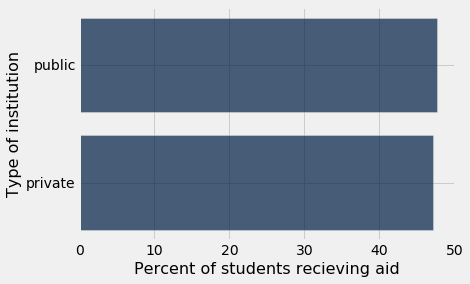

In [125]:
# the bar chart
type_aid.barh('Type of institution', 'Percent of students recieving aid')


## 4. Marginal Histograms (5 points)


Consider the following scatter plot: 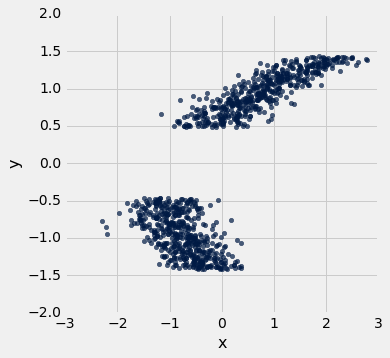

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

**Question 1:** Match each of the following lines of code to the histograms they produce. Explain your reasoning.

**Line 1:** `t.hist('x')` 

**Line 2:** `t.hist('y')` 


**Histogram A:** 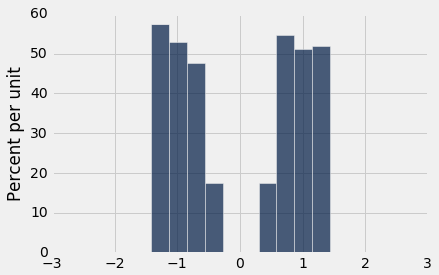
**Histogram B:** 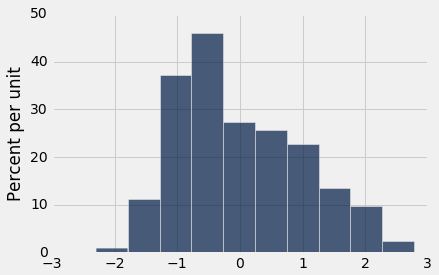

**Histogram for Line 1:** Histogram B

**Explanation:** The points are fairly evenly distributed on the x axis where the values of x range from -3 to 3 with points at almost all numbers especially between -1 and 0. Histogram B reflects this normal distribution of data with the correct concentration of data.

**Histogram for Line 2:** Histogram A

**Explanation:** The points are clustered between -1.5 and -.5 and between .5 and 1.5 on the y axis. This is reflected in a bimodal chart in Histogram A as that is where the data is clustered percentage and density wise.